In [14]:
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns 
import numpy as np 
from pandas.plotting import register_matplotlib_converters as register_matplotlib_converters


# Import data (Make sure to parse dates. Consider setting index column to 'date'.)
df =df = pd.read_csv('fcc-forum-pageviews.csv', index_col='date', parse_dates=True)


# Clean data
# by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.
df = df.loc[(df['value'] >= df['value'].quantile(0.025)) & 
(df['value'] <= df['value'].quantile(0.975))]
df.head()





,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325


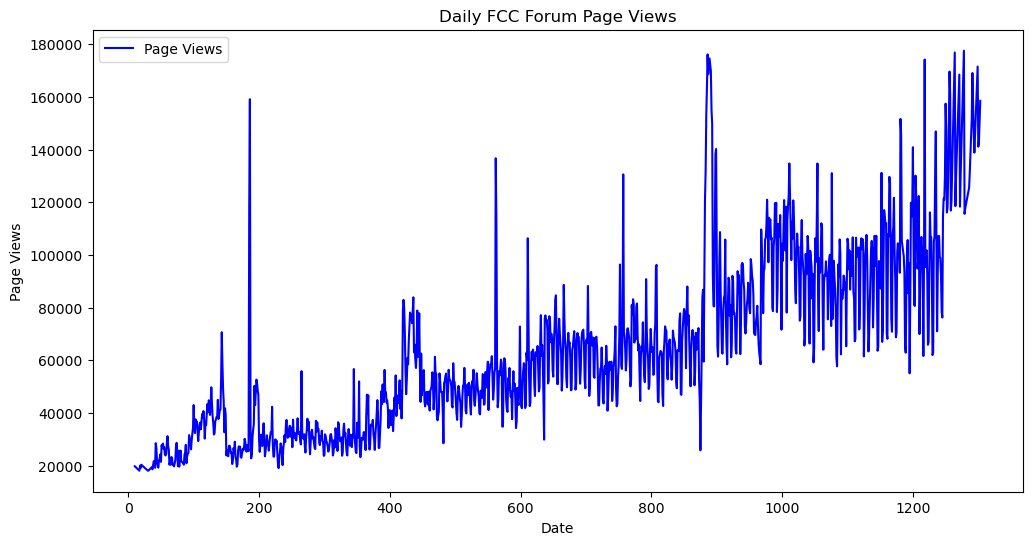

In [13]:
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns 
import numpy as np 
from pandas.plotting import register_matplotlib_converters as register_matplotlib_converters


# Import data (Make sure to parse dates. Consider setting index column to 'date'.)
df =df = pd.read_csv('fcc-forum-pageviews.csv', index_col='date', parse_dates=True)


# Clean data
# by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.
df = df.loc[(df['value'] >= df['value'].quantile(0.025)) & 
(df['value'] <= df['value'].quantile(0.975))]
df.head()






In [15]:
df.head()

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325


In [26]:
# create a bar plot 
# copy and modify data for monthly bar plot 
df_bar = df.copy()
df_bar['month'] = pd.DatetimeIndex(df_bar.index).month
df_bar['year'] = pd.DatetimeIndex(df_bar.index).year

#It should show average daily page views for each month grouped by year.
df_bar = df_bar.groupby(['year','month'])['value'].mean()

df_bar = df_bar.unstack()
# columns
df_bar.columns = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

df_bar


,January,February,March,April,May,June,July,August,September,October,November,December
year,,,,,,,,,,,,
2016,NaN,NaN,NaN,NaN,19432.400000,21875.105263,24109.678571,31049.193548,41476.866667,27398.322581,40448.633333,27832.419355
2017,32785.161290,31113.071429,29369.096774,30878.733333,34244.290323,43577.500000,65806.838710,47712.451613,47376.800000,47438.709677,57701.566667,48420.580645
2018,58580.096774,65679.000000,62693.774194,62350.833333,56562.870968,70117.000000,63591.064516,62831.612903,65941.733333,111378.142857,78688.333333,80047.483871
2019,102056.516129,105968.357143,91214.483871,89368.433333,91439.903226,90435.642857,97236.566667,102717.310345,97268.833333,122802.272727,143166.428571,150733.500000


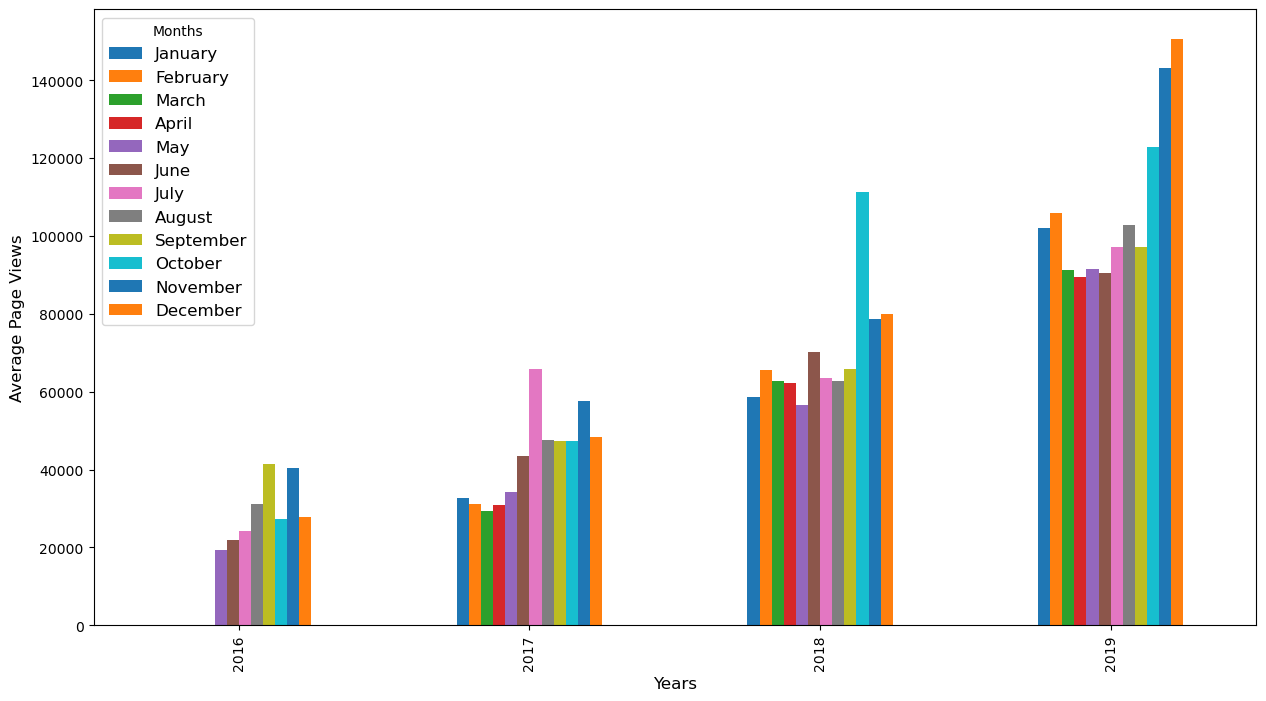

In [28]:
fig = df_bar.plot(kind= 'bar', figsize = (15,8)).figure

plt.title('')
plt.xlabel('Years', fontsize = 12)
plt.ylabel('Average Page Views', fontsize = 12)
plt.legend(loc='upper left', title= 'Months', fontsize = 12)

In [32]:
# Create a box plot
# Prepare data for box plots
df_box = df.copy().reset_index()
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]
df_box


,date,value,year,month
0,2016-05-19,19736,2016,May
1,2016-05-26,18060,2016,May
2,2016-05-27,19997,2016,May
3,2016-05-28,19044,2016,May
4,2016-05-29,20325,2016,May
...,...,...,...,...
1233,2019-11-24,138875,2019,Nov
1234,2019-11-29,171584,2019,Nov
1235,2019-11-30,141161,2019,Nov
1236,2019-12-01,142918,2019,Dec


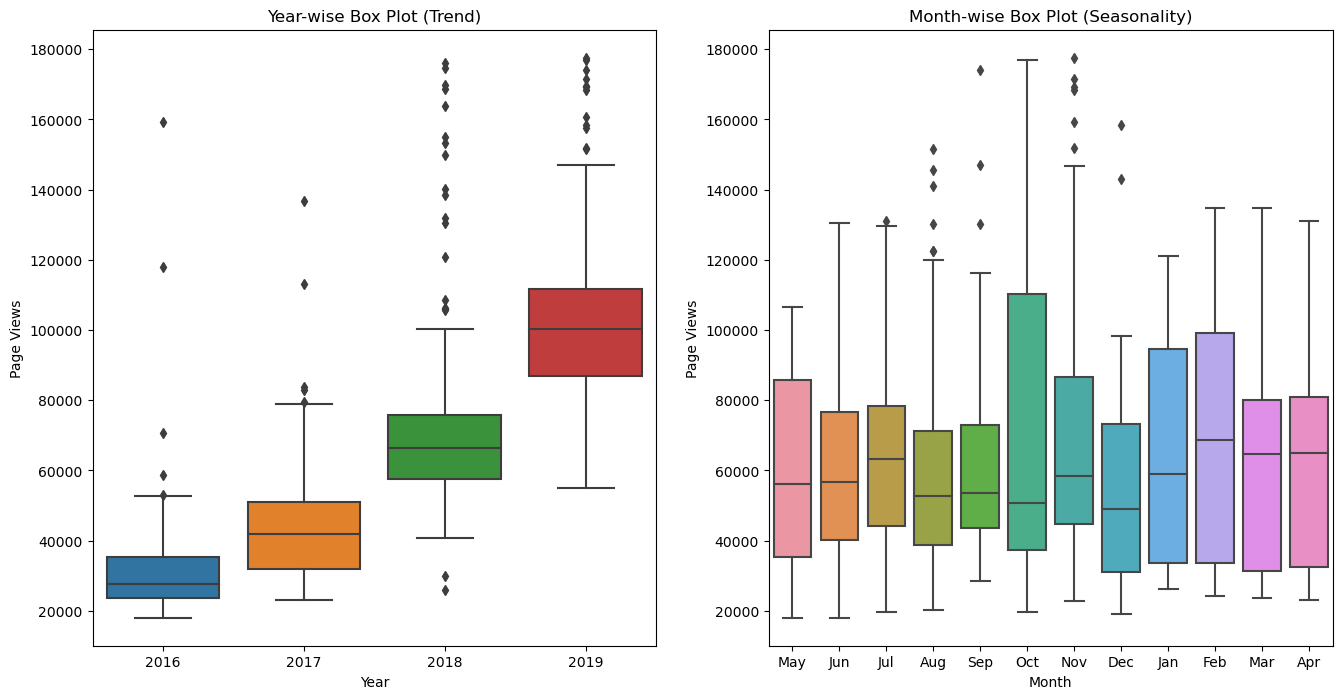

In [37]:
# Draw box plots (using Seaborn)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# Year-wise Box Plot (Trend)
sns.boxplot(ax=ax1, x="year", y="value", data=df_box)
ax1.set_title("Year-wise Box Plot (Trend)")
ax1.set_xlabel("Year")
ax1.set_ylabel("Page Views")

# Month-wise Box Plot (Seasonality)
sns.boxplot(ax=ax2, x="month", y="value", data=df_box)
ax2.set_title("Month-wise Box Plot (Seasonality)")
ax2.set_xlabel("Month")
ax2.set_ylabel("Page Views")

plt.show()
